In [89]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Velocity reward function with all constants parameterized
# def velocity_reward(velocity, distance, a, b, c, d, e, f, g, g2, h):

#     reward = np.exp(-1 * np.abs(velocity))
#     reward *= np.exp(-1* np.abs(distance))
#     return reward

    # reward = velocity**2
    # reward += distance ** 2
    # reward = np.exp(-reward)
    

# # Velocity reward function with all constants parameterized
def velocity_reward(velocity, distance, a, b, c, d, e, f, g, g2, h):
    vel_cap = g - a * velocity**4
    zero_at_target = vel_cap - b * np.abs(distance) * np.exp(-c * np.abs(distance) * np.abs(velocity))
    no_zero_while_error = np.exp(-(g2 / (d * np.abs(distance) + h)) * np.abs(velocity))
    reward = no_zero_while_error * zero_at_target
    reward = np.exp(0.4 * reward)
    reward *= np.exp(-f * np.abs(distance))
    return reward

# Helper functions for gradient ascent
def grad_numeric(func, velocity, distance, params, h=1e-5):
    # Finite difference approximations for d/dvelocity and d/ddistance
    grad_v = (func(velocity + h, distance, *params) - func(velocity, distance, *params)) / h
    grad_d = (func(velocity, distance + h, *params) - func(velocity, distance, *params)) / h
    return np.array([grad_v, grad_d])

def gradient_ascent(init, params, lr=0.001, num_iter=5000, momentum=0.):
    trajectory = [np.array(init)]
    current = np.array(init)
    v = np.zeros_like(current)  # initialize momentum
    for _ in range(num_iter):
        grad = grad_numeric(velocity_reward, current[0], current[1], params)
        v = momentum * v + lr * grad
        current = current + v
        trajectory.append(current.copy())
    return np.array(trajectory)

# Interactive plot function with gradient ascent overlay
def plot_reward(a=0.115, b=14.7, c=33.1, d=26.0, e=0.56, f=1.4, g=3.45, g2=1.6, h=0.3, num=10):
    velocity_vals = np.linspace(-3, 3, 200)
    distance_vals = np.linspace(-0.5, 1.5, 200)
    velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)
    
    reward_grid = velocity_reward(velocity_grid, distance_grid, a, b, c, d, e, f, g, g2, h)
    
    plt.figure(figsize=(8, 6))
    colormap = plt.contourf(
        velocity_grid, distance_grid, reward_grid,
        levels=40, cmap='seismic',
        vmin=-np.max(np.abs(reward_grid)),
        vmax=np.max(np.abs(reward_grid))
    )
    plt.colorbar(colormap, label='Reward')
    
    # Gradient ascent from 10 different random starting points
    for _ in range(num):
        init = [np.random.uniform(-3, 3), np.random.uniform(0.01, 1.5)]
        traj = gradient_ascent(init, (a, b, c, d, e, f, g, g2, h))
        plt.plot(traj[:, 0], traj[:, 1], 'k-', lw=1)  # overlay as a thin black line
        plt.scatter(traj[-1, 0], traj[-1, 1], color='green', s=30)  # mark endpoint with a green dot
    
    plt.xlabel('Velocity')
    plt.ylabel('Distance')
    plt.title('Velocity-Based Reward Function')
    plt.tight_layout()
    plt.show()

# second plot zoomed in on 0,0
def plot_reward_zoomed(a=0.115, b=14.7, c=33.1, d=26.0, e=0.56, f=1.4, g=3.45, g2=1.6, h=0.3):
    velocity_vals = np.linspace(-1, 1, 200)
    distance_vals = np.linspace(0, 0.1, 200)
    velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)
    
    reward_grid = velocity_reward(velocity_grid, distance_grid, a, b, c, d, e, f, g, g2, h)
    
    plt.figure(figsize=(8, 6))
    colormap = plt.contourf(
        velocity_grid, distance_grid, reward_grid,
        levels=200, cmap='seismic',
        vmin=-np.max(np.abs(reward_grid)),
        vmax=np.max(np.abs(reward_grid))
    )
    plt.colorbar(colormap, label='Reward')
    plt.xlabel('Velocity')
    plt.ylabel('Distance')
    plt.title('Velocity-Based Reward Function (Zoomed In)')
    plt.tight_layout()
    plt.show()

def plot(a=0.115, b=14.7, c=33.1, d=26.0, e=0.56, f=1.4, g=3.45, g2=1.6, h=0.3, num=10):
    plot_reward(a, b, c, d, e, f, g, g2, h, num)
    plot_reward_zoomed(a, b, c, d, e, f, g, g2, h)
    print(
        f"Parameters: a={a}, b={b}, c={c}, d={d}, e={e}, f={f}, g={g}, g2={g2}, h={h}"
    )
# Set up the interactive plot
# Initial plot
# Sliders for all parameters
interact(
    plot,
    a=FloatSlider(min=0.0, max=1, step=0.005, value=0.115, description='a'),
    b=FloatSlider(min=0.0, max=100.0, step=0.1, value=14.7, description='b'),
    c=FloatSlider(min=0.0, max=100.0, step=0.1, value=10.5, description='c'),
    d=FloatSlider(min=0.0, max=50.0, step=1.0, value=26.0, description='d'),
    e=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.56, description='e'),
    f=FloatSlider(min=0.0, max=5.0, step=0.1, value=1.4, description='f'),
    g=FloatSlider(min=0.0, max=10.0, step=0.05, value=3.45, description='g (vel cap base)'),
    g2=FloatSlider(min=0.0, max=5.0, step=0.1, value=0.5, description='g2 (exp numerator)'),
    h=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.3, description='h (exp offset)'),
    num=IntSlider(min=0, max=100, step=1, value=10, description='num_ascents'),
)

interactive(children=(FloatSlider(value=0.115, description='a', max=1.0, step=0.005), FloatSlider(value=14.7, …

<function __main__.plot(a=0.115, b=14.7, c=33.1, d=26.0, e=0.56, f=1.4, g=3.45, g2=1.6, h=0.3, num=10)>

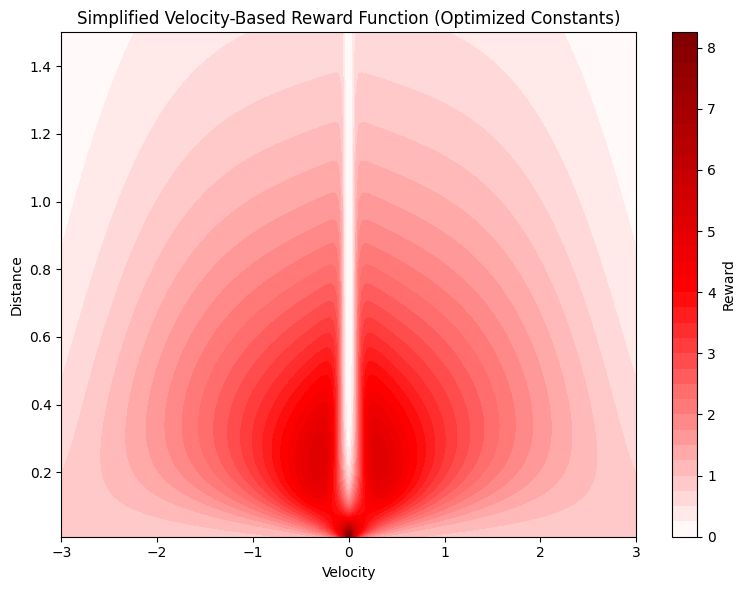

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Simplified velocity reward function with constants written in-place
def simplified_velocity_reward(velocity, distance):
    vel_cap = 5.0 - 0.05 * velocity**4
    zero_at_target = 30.0 * distance * np.exp(-50.0 * distance * np.abs(velocity))
    shaping = np.exp(-(2.0 / (20.0 * distance + 0.1)) * np.abs(velocity))
    reward = shaping * (vel_cap - zero_at_target)
    reward =  np.exp(0.5*reward)
    reward *= np.exp(-2.0 * np.abs(distance))
    return reward

# Compute grid
velocity_vals = np.linspace(-3, 3, 200)
distance_vals = np.linspace(0.01, 1.5, 200)
velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)

# Compute reward over grid
reward_grid = simplified_velocity_reward(velocity_grid, distance_grid)

# Plot
plt.figure(figsize=(8, 6))
colormap = plt.contourf(
    velocity_grid, distance_grid, reward_grid,
    levels=40, cmap='seismic',
    vmin=-np.max(np.abs(reward_grid)),
    vmax=np.max(np.abs(reward_grid))
)
plt.colorbar(colormap, label='Reward')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Simplified Velocity-Based Reward Function (Optimized Constants)')
plt.tight_layout()
plt.show()

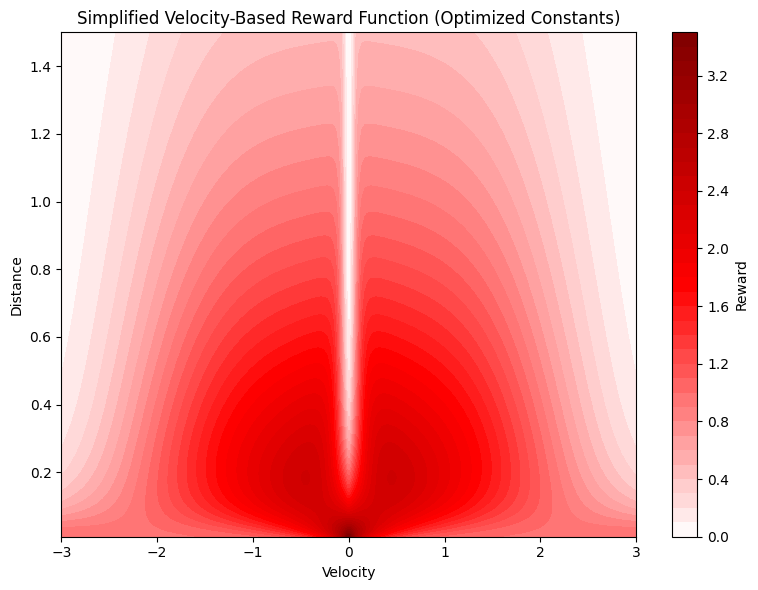

In [57]:
import jax.numpy as jp
def tracking_reward(velocity, distance):
    vel_cap = 3.45 - 0.115 * velocity**4
    zero_at_target =  14.7 * distance * jp.exp(-33.1 * distance * jp.abs(velocity))
    no_zero_while_error = jp.exp(- (1.6 / (26.0 * distance + 0.3)) * jp.abs(velocity))
    reward = no_zero_while_error * (vel_cap - zero_at_target)
    reward = jp.exp(0.4 * reward)
    reward *= jp.exp(-1.4 * jp.abs(distance))
    return reward

# Compute grid
velocity_vals = np.linspace(-3, 3, 200)
distance_vals = np.linspace(0.01, 1.5, 200)
velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)

# Compute reward over grid
reward_grid = tracking_reward(velocity_grid, distance_grid)

# Plot
plt.figure(figsize=(8, 6))
colormap = plt.contourf(
    velocity_grid, distance_grid, reward_grid,
    levels=40, cmap='seismic',
    vmin=-np.max(np.abs(reward_grid)),
    vmax=np.max(np.abs(reward_grid))
)
plt.colorbar(colormap, label='Reward')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Simplified Velocity-Based Reward Function (Optimized Constants)')
plt.tight_layout()
plt.show()

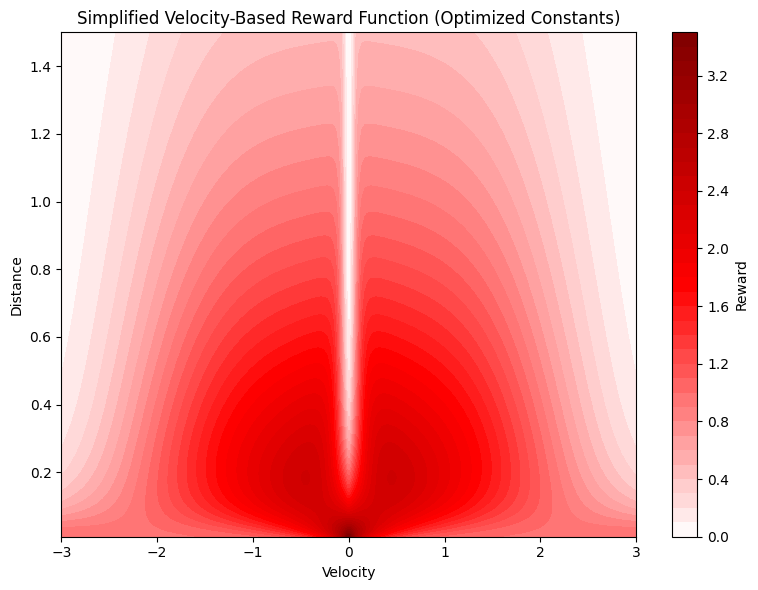

In [58]:
import jax.numpy as jp
def tracking_reward(velocity, distance):
    vel_cap = 3.45 - 0.115 * velocity**4
    zero_at_target =  14.7 * distance * jp.exp(-33.1 * distance * jp.abs(velocity))
    no_zero_while_error = jp.exp(- (1.6 / (26.0 * distance + 0.3)) * jp.abs(velocity))
    reward = no_zero_while_error * (vel_cap - zero_at_target)
    reward = jp.exp(0.4 * reward)
    reward *= jp.exp(-1.4 * jp.abs(distance))
    return reward

# Compute grid
velocity_vals = np.linspace(-3, 3, 200)
distance_vals = np.linspace(0.01, 1.5, 200)
velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)

# Compute reward over grid
reward_grid = tracking_reward(velocity_grid, distance_grid)

# Plot
plt.figure(figsize=(8, 6))
colormap = plt.contourf(
    velocity_grid, distance_grid, reward_grid,
    levels=40, cmap='seismic',
    vmin=-np.max(np.abs(reward_grid)),
    vmax=np.max(np.abs(reward_grid))
)
plt.colorbar(colormap, label='Reward')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Simplified Velocity-Based Reward Function (Optimized Constants)')
plt.tight_layout()
plt.show()

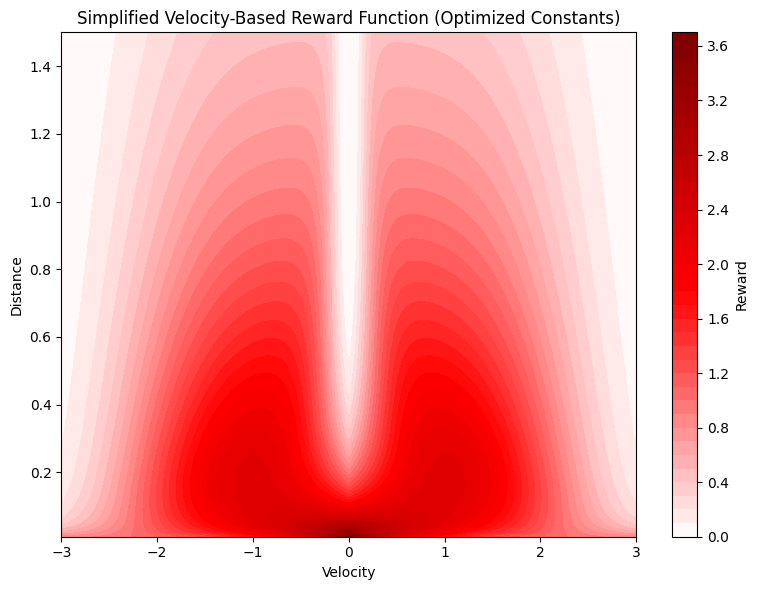

In [59]:
import jax.numpy as jp
def tracking_reward(velocity, distance):
    vel_cap = 3.45 - 0.115 * velocity**4
    zero_at_target =  14.7 * distance * jp.exp(-10.5 * distance * jp.abs(velocity))
    no_zero_while_error = jp.exp(- (0.5 / (26.0 * distance + 0.3)) * jp.abs(velocity))
    reward = no_zero_while_error * (vel_cap - zero_at_target)
    reward = jp.exp(0.4 * reward)
    reward *= jp.exp(-1.4 * jp.abs(distance))
    return reward

# Compute grid
velocity_vals = np.linspace(-3, 3, 200)
distance_vals = np.linspace(0.01, 1.5, 200)
velocity_grid, distance_grid = np.meshgrid(velocity_vals, distance_vals)

# Compute reward over grid
reward_grid = tracking_reward(velocity_grid, distance_grid)

# Plot
plt.figure(figsize=(8, 6))
colormap = plt.contourf(
    velocity_grid, distance_grid, reward_grid,
    levels=40, cmap='seismic',
    vmin=-np.max(np.abs(reward_grid)),
    vmax=np.max(np.abs(reward_grid))
)
plt.colorbar(colormap, label='Reward')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Simplified Velocity-Based Reward Function (Optimized Constants)')
plt.tight_layout()
plt.show()